In [150]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
from scipy import spatial


In [151]:
x = [[1,1.5],[1,2],[3,6.5],[3,7],[9,0],[9,0.5],[5,0],[5,0.5],[9,9],[9,9]]
n = len(x) 

d = np.zeros((n,n))
d_cur = np.zeros((n,n))



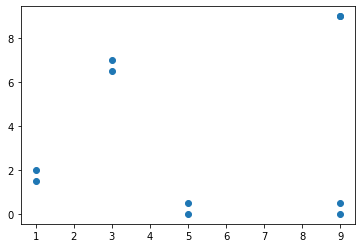

In [152]:
f = [i[0] for i in x]
o = [[i[1] for i in x]]
plt.scatter(f,o)



# calculate distance matrix

In [153]:
for i in range (0,n):
    for j in range (0,n):
        d[i][j] = math.dist(x[i],x[j])
# spatial.distance.cosine(x[i], x[j])
print(d)


[[ 0.          0.5         5.38516481  5.85234996  8.1394103   8.06225775
   4.27200187  4.12310563 10.9658561  10.9658561 ]
 [ 0.5         0.          4.9244289   5.38516481  8.24621125  8.1394103
   4.47213595  4.27200187 10.63014581 10.63014581]
 [ 5.38516481  4.9244289   0.          0.5         8.84590301  8.48528137
   6.80073525  6.32455532  6.5         6.5       ]
 [ 5.85234996  5.38516481  0.5         0.          9.21954446  8.84590301
   7.28010989  6.80073525  6.32455532  6.32455532]
 [ 8.1394103   8.24621125  8.84590301  9.21954446  0.          0.5
   4.          4.03112887  9.          9.        ]
 [ 8.06225775  8.1394103   8.48528137  8.84590301  0.5         0.
   4.03112887  4.          8.5         8.5       ]
 [ 4.27200187  4.47213595  6.80073525  7.28010989  4.          4.03112887
   0.          0.5         9.8488578   9.8488578 ]
 [ 4.12310563  4.27200187  6.32455532  6.80073525  4.03112887  4.
   0.5         0.          9.39414711  9.39414711]
 [10.9658561  10.6301458

# main code

In [157]:
def key_clustering( dd , c_target, k1 , g ):


########################################### initial

        n = dd.shape[0]
        k = k1+1
        end_key = 2
        list_k=[]
        r = np.zeros((n,k))

############################################ calculate R
        for i in range (0,n):
                list_k = sorted(dd[i])[0:k] # take 2 min value k = 2 
                for j in range(0,n):  # finde index of that vslues
                        for x in range(0,len(list_k)):
                                if dd[i][j] == list_k[x] :
                                        r[i][x] = j
                                # if dd[i][j] == y:
                                #         r[i][1] = j 
                        
        print(r)                        
        l = [0,1,2,3,4,5,6,7,8,9]
        c_per = n
        c_cur = math.floor(n/g)
        s_cur = []
        ########################### calculate d_cur

        for i in range (0,n):
                for j in range(0,n):
                        temp = 0
                        for a in range (0,k):
                                for b in range (0,k):
                                            temp = temp + dd[int(r[i][a] ),int(r[j][b])]
                        d_cur[i][j] = temp / ((k)*(k))
        

        ############## loop #############

        while c_cur > c_target :
                s_cur = detect_key(d_cur ,c_cur)

                ############## update labels ##############
                for i in range(len(l)):
                        
                        min = 80000

                        if(l[i] not in s_cur):
                                for j in s_cur:
                                        if d_cur[l[i],j] < min:
                                                min = d_cur[ l[i] , j ]
                                                index = j
                                l[i] = index
        
                
                #################  update distance ###############


                from collections import Counter

                unique_values =list( Counter(l).keys()) # equals to list(set(words))
                unique_count = list(Counter(l).values()) # counts the elements' frequency
                # print(l)
                # print(unique_values)
                # print(unique_count)
                samp = []

                for i in unique_count:
                        e = np.zeros((i*(3)))
                        samp.append(e)
                
                p = []
                
                for x in range(0,len(unique_values)):
                                nn = 0
                                for y in range(0,len(l)):
                                        if unique_values[x] == l[y]:

                                                samp[x][nn] = y
                                                nn = nn+1

                                                for i in range(1,k):
                                                        samp[x][nn] = r[y][i] 
                                                        nn = nn+1

                sample = []

                # for x in range(0, len(samp)):
                #         unique_numbers = set(samp[x])
                #         nn= 0                               
                #         for number in unique_numbers:
                #                 samp[x][nn] = (number)
                #                 nn=1+nn

                #         w = np.zeros((nn))
                #         for t in range(0, nn):
                #                 w[t] = samp[x][t]

                #         sample.append(w)



                lo = []

                for e in samp:
                        lo.append(list(map(int, e))) 
                

                label_dict = dict(zip(unique_values, lo))

                for x,y  in label_dict.items():
                        for p,q in label_dict.items():
                                sum  = 0
                                for a in y:
                                       for b in q:
                                               sum+=dd[a,b]

                                d_cur[x,p] = sum /(len(q)*len(y))

                c_per = c_cur
                c_cur = math.floor(c_cur/g)



        s_final = detect_key(d_cur ,c_target)

                  ############## update labels ##############

        for i in range(len(l)):
                min = 80000
                if(l[i] not in s_final):
                        for j in s_final:
                                if d_cur[l[i],j] < min:
                                        min = d_cur[ l[i] , j ]
                                        index = j
                        l[i] = index
        # count = 0
                # for j in s_final:
                #         if(l[i] != j):
                #                 count+=1
                # if(count == len(s_final)):# l[i] != in s_final
                #         for j in s_final:
                #                 if d_cur[l[i],j] < min:
                #                         min = d_cur[ l[i] , j ]
                #                         index = j
                #         l[i] = index

        return l
                




dd = np.copy(d)
c_target = 5
k1 = 2
g = 3
key_clustering( dd, c_target, k1 , g  )



[[0. 1. 7.]
 [1. 0. 7.]
 [2. 3. 1.]
 [3. 2. 1.]
 [4. 5. 6.]
 [5. 4. 7.]
 [6. 7. 4.]
 [7. 6. 5.]
 [9. 9. 3.]
 [9. 9. 3.]]


[1, 1, 2, 2, 7, 7, 7, 7, 8, 9]

# finde keys

In [155]:
def detect_key(d_cur , c_cur):
    m = d_cur.shape[0]
    temp = []
    k = []
    s = []
    n = 0
#############   find I1    ############# min mean

    for i in range (0,m):# i1
        sum = 0
        for j in range (0,m):
            sum += d_cur[i][j]

        temp.append(sum / m) 

    i1 = temp.index(sorted(temp)[0])  


    for t in range (0,m):# update s and k for i1
        if t != i1:
            k.append(t)
    s.append(i1)

########################################



    while( n < c_cur-1 ):
        min_i = []
#############   find In    ############# max min

        for i in k: #finde min 
            min = 8000
            for j in s:
                if d_cur[i][j] < min:
                    min = d_cur[i][j]
            min_i.append(min)# list of min values in each row

        p = 0
        for i in k:# find max of mins
            for j in s:
                if d_cur[i][j] == max( min_i):
                    i_n = i
                    k.remove(i_n)
                    p = 1
                    break
            if p == 1:
                break

        s.append(i_n)

        # unique_numbers = set(s)
        # ss = []

        # for number in unique_numbers:
        #     ss.append(number)
        # s = ss
        n+=1
    return s

     

